<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 6.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-02-27 17:52:43
-------------------
qualified stocks: 89
with latest results: 83
still star stocks: 45
-------------------
Initial Investment:  1.07 C
CY Investment:  1.20 C
Reserve:  1.48 L
Current:  1.08 C
-------------------
Today PnL: -94.36 K (-0.86%)
Current PnL: -25.29 L (-21.14%)
CY Booked + Current PnL: -11.42 L (-9.55%)
-------------------
Total profit:  1.76 L
Total loss:  -27.05 L
-------------------
Total Booked + Current PnL: 1.69 L (1.59%)
Total Booked PnL: 26.98 L (25.33%)
Curr Year Booked PnL: 13.87 L (12.81%)
Prev Year Booked PnL: 13.11 L (12.31%)
Est FTT:  1.88 C
Est FTT PnL: 79.97 L (73.84%)
-------------------
Est LTT:  2.49 C
Est LTT PnL: 1.40 C (129.5%)
Deployed:  1.07 C
Current:  1.08 C
CAGR/XIRR %: 1.28%
Row successfully appended and saved to data/myPortfolioDB.csv.


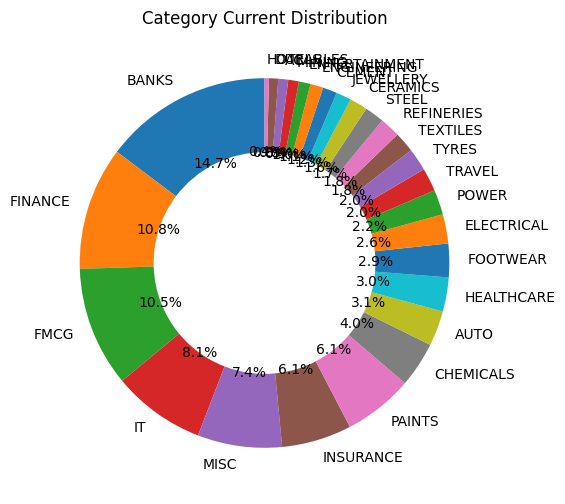

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 1

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
54,NMDC,65.62,82.00,32.73,M-MC,78.65,99741.0,-658.0,25723.0,0.59,...,25.79,24.96,507.0,-0.03,0.93,8.65,XY25,NTT,MC,MINING
11,AXISBANK,986.10,1317.30,-25.83,H-LC,94.38,103703.0,3121.0,30665.0,0.75,...,29.57,33.59,NaN,0.10,0.97,7.24,X40,ATH,LC,BANKS
68,SBILIFE,1483.67,1928.65,-16.81,H-LC,87.64,99943.0,-947.0,31202.0,-0.14,...,31.22,29.99,NaN,-0.03,0.94,9.78,AR,ATH,LC,INSURANCE
46,LICI,750.57,983.00,-26.80,H-LC,37.08,99307.0,-1269.0,32414.0,-2.04,...,32.64,30.97,202.0,-0.04,0.93,0.00,XY25,NTT,LC,INSURANCE
73,SIS,477.00,528.00,3.25,M-SC,69.66,52572.0,-28518.0,37189.0,-2.43,...,70.74,10.69,-28.0,-0.77,0.49,1.34,X40N,NTT,SC,MISC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,REPCOHOME,527.76,880.00,-27.19,H-SC,41.57,126161.0,-68582.0,198565.0,1.70,...,157.39,66.74,-44.0,-0.35,1.18,6.10,XY24,NTT,SC,FINANCE
63,SAIL,130.64,228.00,60.63,M-MC,85.39,182498.0,-42464.0,210110.0,-0.18,...,115.13,74.53,-18.0,-0.20,1.71,5.96,XY24,BTT,MC,STEEL
58,RBLBANK,230.61,388.00,-23.32,M-SC,95.51,165476.0,-68824.0,228737.0,2.80,...,138.23,68.25,-48.0,-0.30,1.55,8.97,XY24,NTT,SC,BANKS
12,BANDHANBNK,217.54,400.00,-41.25,H-SC,35.96,150168.0,-88473.0,288638.0,1.15,...,192.21,83.87,-29.0,-0.31,1.41,5.05,XY24,NTT,SC,BANKS


In [5]:
# Xceptional allocation
tmp_df = df_portfolio_features[df_portfolio_features['Conviction'].str.startswith('X-', na=False)]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
32,HAVELLS,1588.50,2077.12,-7.96,X-LC,59.55,91429.0,-8646.0,39433.0,-6.24,...,43.13,30.76,NaN,-0.22,0.86,0.16,X40,ATH,LC,ELECTRICAL
35,HINDUNILVR,2430.78,2723.00,-21.49,X-LC,49.44,188576.0,-15610.0,40148.0,-0.64,...,21.29,12.02,-3.0,-0.39,1.77,3.73,XY25,NTT,LC,FMCG
52,NESTLEIND,2225.87,2755.00,-17.58,X-LC,93.26,207316.0,4762.0,43391.0,1.24,...,20.93,23.77,NaN,0.11,1.94,6.65,XY25,NTT,LC,FMCG
50,MEDANTA,1022.60,1486.00,3.90,X-MC,100.00,181366.0,25931.0,44507.0,-1.55,...,24.54,45.32,8.0,0.58,1.70,23.40,XY24,NTT,MC,HEALTHCARE
78,TATAELXSI,7332.28,9000.00,-28.08,X-MC,30.34,77884.0,-24768.0,48117.0,-2.33,...,61.78,22.74,-10.0,-0.51,0.73,0.00,X40N,NTT,MC,IT
20,CERA,9059.90,10420.45,-29.12,X-SC,16.85,53936.0,-36663.0,50268.0,-0.14,...,93.20,15.02,-57.0,-0.73,0.50,0.00,X40N,ATH,SC,CERAMICS
60,RELIANCE,1288.53,1526.00,-10.67,X-LC,65.17,190722.0,-12866.0,50389.0,0.26,...,26.42,18.43,67.0,-0.26,1.79,0.26,XY25,NTT,LC,REFINERIES
55,PIDILITIND,2482.94,3576.00,-22.97,X-LC,48.31,155272.0,11261.0,52140.0,-0.72,...,33.58,44.02,10.0,0.22,1.45,0.00,X40,BTT,LC,CHEMICALS
39,INFY,1436.24,2275.00,-4.88,X-LC,61.80,183487.0,34118.0,53119.0,-0.19,...,28.95,58.40,33.0,0.64,1.72,28.24,X40,BTT,LC,IT
80,TCS,4164.02,4998.00,-13.94,X-LC,26.97,140889.0,-21508.0,54031.0,-0.47,...,38.35,20.03,8.0,-0.40,1.32,0.45,X40,BTT,LC,IT


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
54,NMDC,65.62,82.0,32.73,M-MC,78.65,99741.0,-658.0,25723.0,0.59,...,25.79,24.96,507.0,-0.03,0.93,8.65,XY25,NTT,MC,MINING
46,LICI,750.57,983.0,-26.80,H-LC,37.08,99307.0,-1269.0,32414.0,-2.04,...,32.64,30.97,202.0,-0.04,0.93,0.00,XY25,NTT,LC,INSURANCE
35,HINDUNILVR,2430.78,2723.0,-21.49,X-LC,49.44,188576.0,-15610.0,40148.0,-0.64,...,21.29,12.02,-3.0,-0.39,1.77,3.73,XY25,NTT,LC,FMCG
69,SBIN,760.30,863.0,-28.64,M-LC,50.56,186534.0,-14946.0,42157.0,-0.98,...,22.60,13.51,93.0,-0.35,1.75,0.00,XY25,NTT,LC,BANKS
52,NESTLEIND,2225.87,2755.0,-17.58,X-LC,93.26,207316.0,4762.0,43391.0,1.24,...,20.93,23.77,NaN,0.11,1.94,6.65,XY25,NTT,LC,FMCG
50,MEDANTA,1022.60,1486.0,3.90,X-MC,100.00,181366.0,25931.0,44507.0,-1.55,...,24.54,45.32,8.0,0.58,1.70,23.40,XY24,NTT,MC,HEALTHCARE
60,RELIANCE,1288.53,1526.0,-10.67,X-LC,65.17,190722.0,-12866.0,50389.0,0.26,...,26.42,18.43,67.0,-0.26,1.79,0.26,XY25,NTT,LC,REFINERIES
66,SBICARD,765.91,1075.0,-8.67,H-MC,98.88,201336.0,21347.0,51280.0,1.91,...,25.47,40.36,-1.0,0.42,1.88,29.44,XY24,NTT,MC,FINANCE
85,UNIONBANK,123.87,163.0,-18.06,M-LC,96.63,130903.0,-9937.0,54429.0,-1.00,...,41.58,31.59,-39.0,-0.18,1.23,13.71,XY24,NTT,LC,BANKS
15,BERGEPAINT,558.54,680.0,-26.88,H-MC,92.13,160164.0,-16893.0,55401.0,0.86,...,34.59,21.75,-14.0,-0.30,1.50,14.57,XY24,NTT,MC,PAINTS


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
68,SBILIFE,1483.67,1928.65,-16.81,H-LC,87.64,99943.0,-947.0,31202.0,-0.14,...,31.22,29.99,NaN,-0.03,0.94,9.78,AR,ATH,LC,INSURANCE
38,INDUSINDBK,1354.50,1800.00,-19.23,H-MC,97.75,59662.0,-17544.0,42939.0,1.20,...,71.97,32.89,-21.0,-0.41,0.56,12.98,XR,NTT,MC,BANKS
49,MASFIN,326.60,399.50,-35.61,H-SC,75.28,71865.0,-26115.0,47984.0,2.48,...,66.77,22.32,-74.0,-0.54,0.67,2.48,XR,ATH,SC,FINANCE
82,TRIDENT,37.35,48.00,41.14,M-SC,32.58,65776.0,-26478.0,52785.0,-1.88,...,80.25,28.51,-16.0,-0.50,0.62,0.00,XR,NTT,SC,TEXTILES
19,CAMS,3643.00,5250.99,-17.88,H-SC,20.22,91217.0,-10787.0,55807.0,-2.61,...,61.18,44.14,261.0,-0.19,0.85,20.35,XR,ATH,SC,MISC
72,SIEMENS,6028.45,7969.85,-25.41,X-LC,8.99,79673.0,-22811.0,55811.0,-3.12,...,70.05,32.20,NaN,-0.41,0.75,2.61,AR,ATH,LC,ELECTRICAL
24,DEN,52.79,75.00,-35.65,L-SC,40.45,53584.0,-30880.0,66417.0,-1.01,...,123.95,42.07,-21.0,-0.46,0.50,0.00,AR,NTT,SC,ENTERTAINMENT
16,BRITANNIA,4905.19,6446.05,-2.96,X-LC,43.82,191312.0,-4896.0,66538.0,-0.32,...,34.78,31.41,239.0,-0.07,1.79,3.79,AR,ATH,LC,FMCG
45,LAOPALA,369.40,464.00,-31.02,H-SC,1.12,58053.0,-42793.0,68619.0,-2.83,...,118.20,25.61,-50.0,-0.62,0.54,2.90,AR,NTT,SC,CERAMICS
17,BSOFT,628.85,844.81,-16.34,M-SC,23.60,78698.0,-31351.0,69144.0,-1.96,...,87.86,34.34,-28.0,-0.45,0.74,0.00,XR,ATH,SC,IT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.93
1,20,36.11
2,30,49.75


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,41.86
X40,14.76
X40N,11.79
AR,10.50
XR,9.35
XY25,9.11
X200,1.37
SR,1.27


In [10]:
# conviction-wise allocation
df_portfolio_features.groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-LC,22.25
M-SC,20.42
H-SC,18.46
M-MC,7.72
H-MC,6.63
M-LC,6.63
X-MC,6.53
H-LC,4.36
X-SC,2.88


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features.groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          11.53
X40       X-LC          10.10
XY24      H-SC           8.57
          H-MC           6.07
XY25      X-LC           5.50
X40N      H-SC           5.35
XY24      M-MC           5.17
          M-LC           4.88
AR        X-LC           4.08
X40N      M-SC           3.45
XR        M-SC           3.13
          H-SC           3.05
X40       H-LC           2.49
AR        X-MC           1.98
XY25      M-LC           1.75
XY24      X-MC           1.70
X40N      X-MC           1.68
AR        H-SC           1.49
X200      X-LC           1.37
X40N      X-SC           1.31
XY24      X-LC           1.20
X40       X-MC           1.17
          M-SC           1.00
XY24      L-SC           0.99
AR        H-LC           0.94
XY25      H-LC           0.93
          M-MC           0.93
XR        X-SC           0.92
          L-SC           0.89
AR        M-MC           0.82
XR        M-MC           0.80
AR        M-SC           0.69
SR        X-SC           0.65
          M-SC           0.62
XR        H-MC           0.56
AR        L-SC           0.50
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.73,-17.77,71.83
FINANCE,10.78,-26.01,77.81
FMCG,10.50,-8.46,41.34
IT,8.14,-28.15,92.01
MISC,7.38,-28.11,72.59
INSURANCE,6.13,-4.78,54.08
PAINTS,6.09,-26.49,63.93
CHEMICALS,3.96,-27.74,111.91
AUTO,3.06,-25.58,80.79


In [13]:
# bucketX stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,77.66,8294887.0,-16.4,-1360452.0,61.77,5123369.0


In [14]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3402861.0
XR,1237469.0
X40N,1206919.0
AR,962338.0
X40,672752.0
XY25,234222.0
SR,209329.0
X200,71511.0


In [15]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2287311.0
M-SC,2096786.0
X-LC,898045.0
M-MC,718250.0
X-SC,368950.0
H-MC,347661.0
L-SC,342796.0
M-LC,332673.0
X-MC,321686.0


In [16]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          1003782.0
          H-SC           970076.0
X40N      H-SC           562844.0
XY24      M-MC           521552.0
XR        M-SC           452634.0
X40       X-LC           435731.0
X40N      M-SC           407287.0
AR        H-SC           406230.0
XR        H-SC           348161.0
XY24      H-MC           304722.0
          M-LC           290516.0
AR        X-LC           197779.0
XR        L-SC           183462.0
XY25      X-LC           133928.0
XR        X-SC           127314.0
SR        X-SC           126910.0
X40N      X-MC           122062.0
          X-SC           114726.0
X40       H-LC           103934.0
XY24      L-SC            92917.0
AR        X-MC            89569.0
          M-MC            88016.0
          M-SC            83125.0
XR        M-MC            82959.0
SR        M-SC            82419.0
X200      X-LC            71511.0
X40       M-SC            67539.0
AR        L-SC            66417.0
X40       X-MC            65548.0
XY24      X-LC            59096.0
          X-MC            44507.0
XR        H-MC            42939.0
XY25      M-LC            42157.0
          H-LC            32414.0
AR        H-LC            31202.0
XY25      M-MC            25723.0
Name: FTT Amt, dtype: float64

In [17]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,22
H-SC,18
X-LC,14
M-MC,7
M-LC,5
H-MC,5
X-MC,5
H-LC,4
X-SC,4
